Load in the data “Cat_Hwt.csv” from the dataset available in moodle. Data was collected on male and female adult cats used for experiments:

Question 1: Exploration [45 marks]

Describe the dataset
State the number of rows and columns.
Identify the types of variables (categorical, numerical).


In [2]:
import pandas as pd

# Load the data
cat_data = pd.read_csv('Cat_Hwt.csv')

# Basic info about the dataset
print("Dataset shape:", cat_data.shape)

# What type of collum are in this dataset
print("\nColumn types:")
print(cat_data.dtypes)

# Show the first 5 rows of the dataset
print("\nFirst few rows:")
print(cat_data.head())

# Dataset basic info
print("\n Baisc info about the dataset:")
print(cat_data.info())


Dataset shape: (144, 5)

Column types:
Sex        object
Bwt       float64
Hwt       float64
Height    float64
Age       float64
dtype: object

First few rows:
  Sex  Bwt  Hwt  Height   Age
0   F  2.0  7.0    20.7  11.5
1   F  2.0  7.4    24.0   5.9
2   F  2.0  9.5    24.4  19.1
3   F  2.1  7.2    14.8  10.6
4   F  2.1  7.3    25.9   9.5

 Baisc info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
 3   Height  144 non-null    float64
 4   Age     144 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.8+ KB
None


### The code above tells us:

- There is 144 rows and 5.
- All of the types of variables are numerical but the Sex which is categorical.

### Q1B) Data quality
- Check for missing values and outliers. 
- Suggest how to handle them.


In [3]:
# Check for missing values
print("Missing values:")
print(cat_data.isnull().sum())

Missing values:
Sex       0
Bwt       0
Hwt       0
Height    0
Age       0
dtype: int64


There is currently no missing values in the dataset

In [4]:
# Outlier detection without loops
Q1 = cat_data[['Bwt', 'Hwt', 'Height', 'Age']].quantile(0.25)
Q3 = cat_data[['Bwt', 'Hwt', 'Height', 'Age']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers without loop
outliers = ((cat_data[['Bwt', 'Hwt', 'Height', 'Age']] < lower_bound) | 
            (cat_data[['Bwt', 'Hwt', 'Height', 'Age']] > upper_bound))

print("\nOUTLIERS DETECTED:")
print(outliers.sum())


OUTLIERS DETECTED:
Bwt       0
Hwt       2
Height    0
Age       0
dtype: int64


### What was found:
- The dataset has all data intact there is no missing data. 

- There is 2 cats that are outliers both has larger then normal heart weight (Hwt)

- I don't remove these 2 outliers because it isn't an error with the data, those cats are just abnormal.

### Q1. C) Univariate analysis
- Create and interpret plots for each variable (histograms, boxplots, bar charts).
- Summarize key statistics for numerical variables.


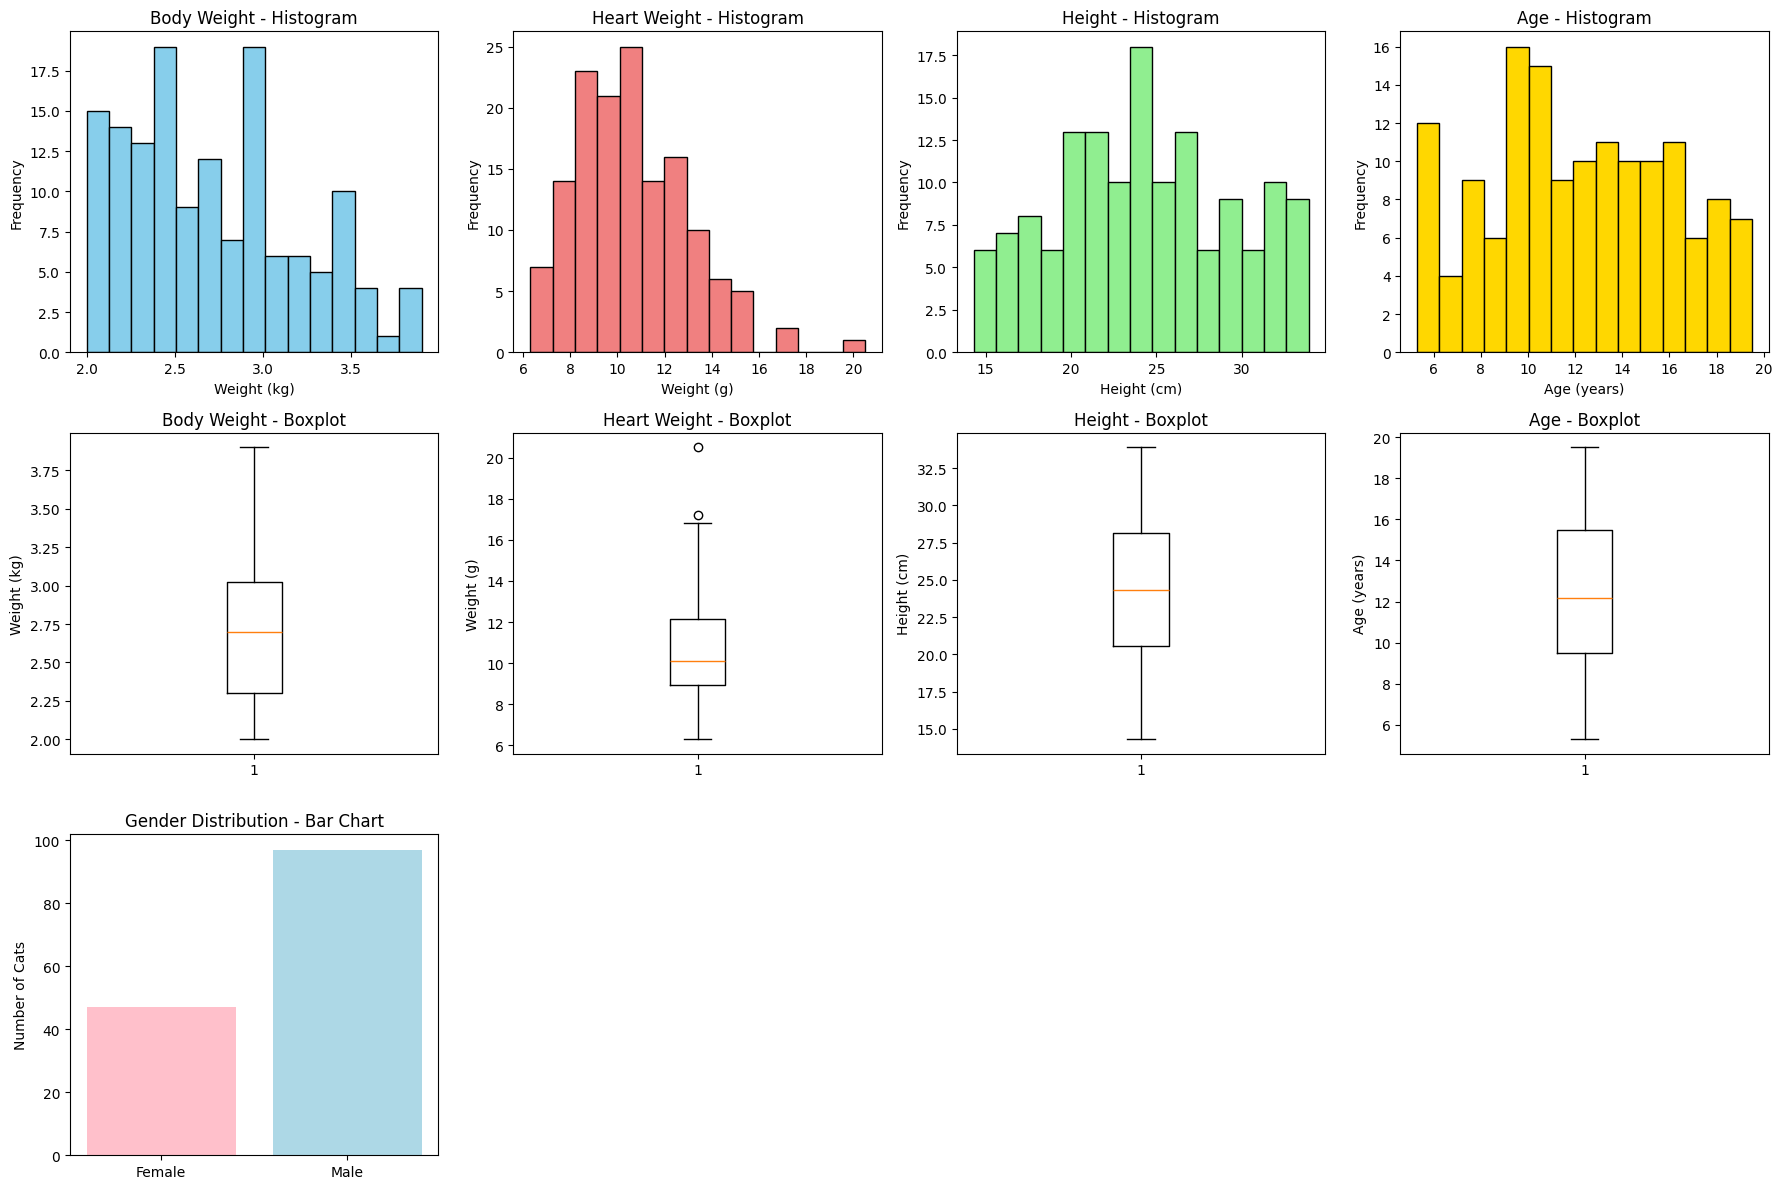

In [5]:
import matplotlib.pyplot as plt

# 3. Create ALL plots in one organized figure
fig, axes = plt.subplots(3, 4, figsize=(18, 12))

# Body Weight (Bwt)
axes[0,0].hist(cat_data['Bwt'], bins=15, color='skyblue', edgecolor='black')
axes[0,0].set_title('Body Weight - Histogram')
axes[0,0].set_xlabel('Weight (kg)')
axes[0,0].set_ylabel('Frequency')

axes[1,0].boxplot(cat_data['Bwt'])
axes[1,0].set_title('Body Weight - Boxplot')
axes[1,0].set_ylabel('Weight (kg)')

# Heart Weight (Hwt)
axes[0,1].hist(cat_data['Hwt'], bins=15, color='lightcoral', edgecolor='black')
axes[0,1].set_title('Heart Weight - Histogram')
axes[0,1].set_xlabel('Weight (g)')
axes[0,1].set_ylabel('Frequency')

axes[1,1].boxplot(cat_data['Hwt'])
axes[1,1].set_title('Heart Weight - Boxplot')
axes[1,1].set_ylabel('Weight (g)')

# Height
axes[0,2].hist(cat_data['Height'], bins=15, color='lightgreen', edgecolor='black')
axes[0,2].set_title('Height - Histogram')
axes[0,2].set_xlabel('Height (cm)')
axes[0,2].set_ylabel('Frequency')

axes[1,2].boxplot(cat_data['Height'])
axes[1,2].set_title('Height - Boxplot')
axes[1,2].set_ylabel('Height (cm)')

# Age
axes[0,3].hist(cat_data['Age'], bins=15, color='gold', edgecolor='black')
axes[0,3].set_title('Age - Histogram')
axes[0,3].set_xlabel('Age (years)')
axes[0,3].set_ylabel('Frequency')

axes[1,3].boxplot(cat_data['Age'])
axes[1,3].set_title('Age - Boxplot')
axes[1,3].set_ylabel('Age (years)')

# Sex - Bar chart (span two rows)
axes[2,0].bar(['Female', 'Male'], cat_data['Sex'].value_counts().sort_index(), color=['pink', 'lightblue'])
axes[2,0].set_title('Gender Distribution - Bar Chart')
axes[2,0].set_ylabel('Number of Cats')

# Hide empty subplots
axes[2,1].set_visible(False)
axes[2,2].set_visible(False)
axes[2,3].set_visible(False)

plt.tight_layout()
plt.show()

### Whats going on with the charts above
- There are three different types of charts 
    1. Histogram 
        - Body weight: cats with differnt body weight.
        - Heart weight: Cats heart weight 
        - Height: Cats distrabution of hight 
        - Age 
    2. Boxplot
        - Body weight: shows the median, quartile and any outliers.
        - Heart weight: shows that there is 2 outliers.
        - Height: whats the distrabution of the hight  
    3. Bar chart
        - Gender: what is the population of both cat genders. 
        

I created both a histogram and a boxplot for numerical veriables. For the categorical variable, I created a bar chart.

### Bivariate analysis
- Explore relationships between pairs of variables using plots/tables.

- For any pair showing potential differences between two groups, conduct one hypothesis test:
    - State hypotheses and assumptions
    - Check if assumptions are met
    - Perform the test and interpret results

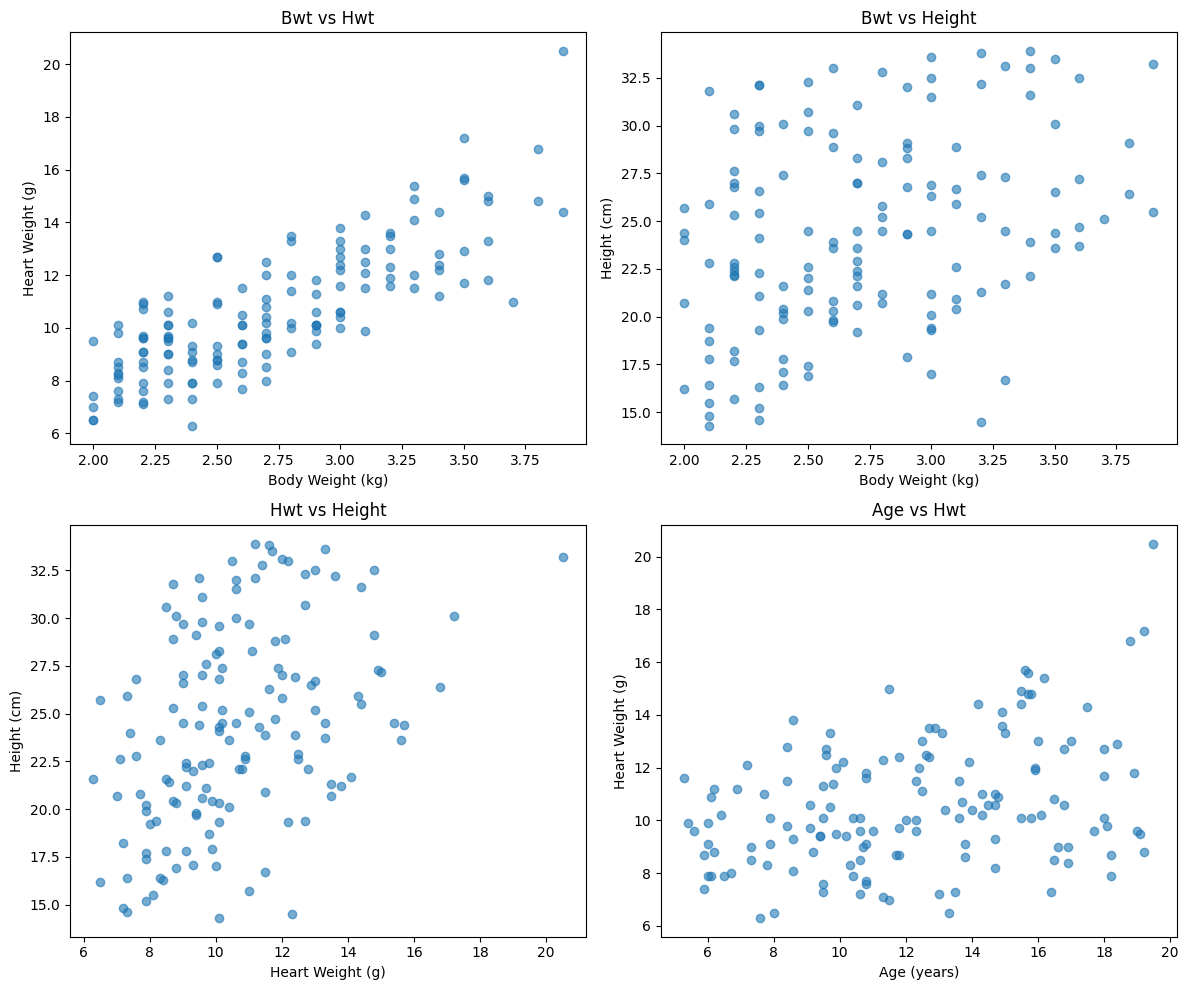

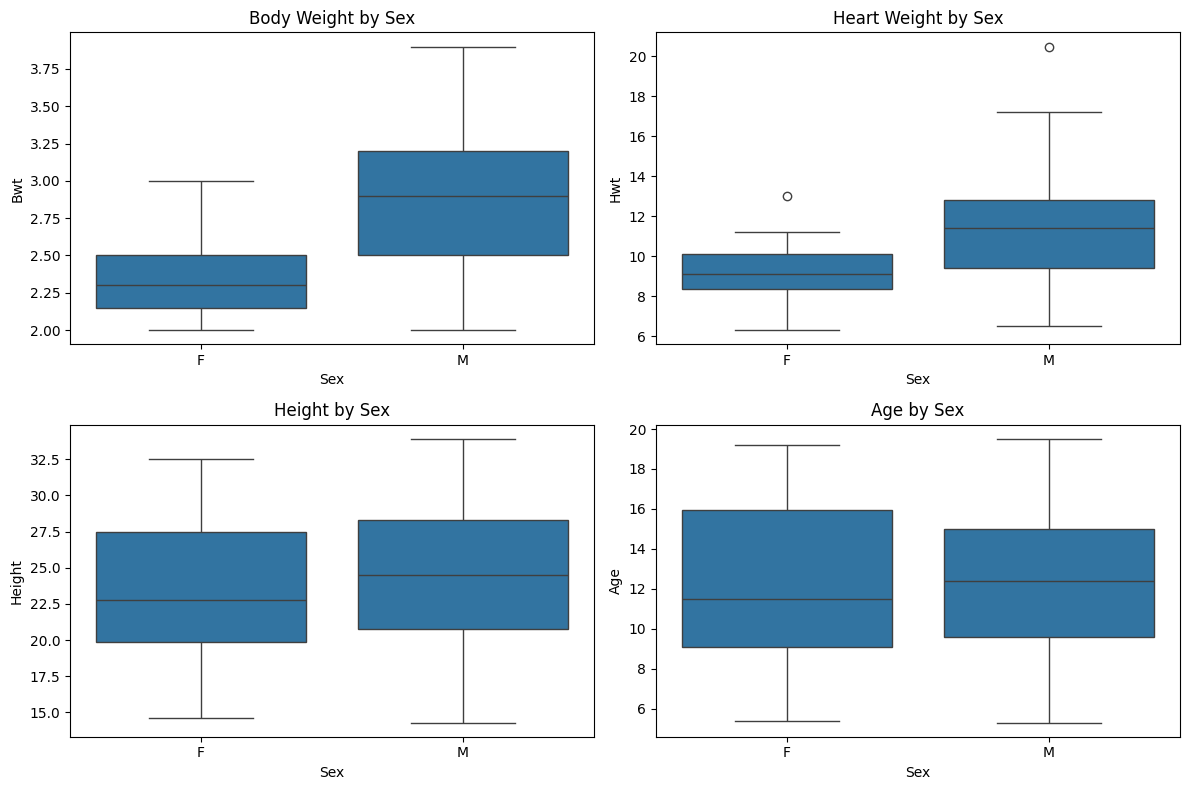

In [6]:
import seaborn as sns

# 1. Scatter plots for numerical vs numerical relationships
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Body Weight vs Heart Weight
axes[0,0].scatter(cat_data['Bwt'], cat_data['Hwt'], alpha=0.6)
axes[0,0].set_xlabel('Body Weight (kg)')
axes[0,0].set_ylabel('Heart Weight (g)')
axes[0,0].set_title('Bwt vs Hwt')

# Body Weight vs Height
axes[0,1].scatter(cat_data['Bwt'], cat_data['Height'], alpha=0.6)
axes[0,1].set_xlabel('Body Weight (kg)')
axes[0,1].set_ylabel('Height (cm)')
axes[0,1].set_title('Bwt vs Height')

# Heart Weight vs Height
axes[1,0].scatter(cat_data['Hwt'], cat_data['Height'], alpha=0.6)
axes[1,0].set_xlabel('Heart Weight (g)')
axes[1,0].set_ylabel('Height (cm)')
axes[1,0].set_title('Hwt vs Height')

# Age vs Heart Weight
axes[1,1].scatter(cat_data['Age'], cat_data['Hwt'], alpha=0.6)
axes[1,1].set_xlabel('Age (years)')
axes[1,1].set_ylabel('Heart Weight (g)')
axes[1,1].set_title('Age vs Hwt')

plt.tight_layout()
plt.show()

# 2. Boxplots for categorical vs numerical (Sex differences)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Sex vs Body Weight
sns.boxplot(x='Sex', y='Bwt', data=cat_data, ax=axes[0,0])
axes[0,0].set_title('Body Weight by Sex')

# Sex vs Heart Weight
sns.boxplot(x='Sex', y='Hwt', data=cat_data, ax=axes[0,1])
axes[0,1].set_title('Heart Weight by Sex')

# Sex vs Height
sns.boxplot(x='Sex', y='Height', data=cat_data, ax=axes[1,0])
axes[1,0].set_title('Height by Sex')

# Sex vs Age
sns.boxplot(x='Sex', y='Age', data=cat_data, ax=axes[1,1])
axes[1,1].set_title('Age by Sex')

plt.tight_layout()
plt.show()

### what relationship were found 
- there is a strong correlation between body weight and heart weight.
- Hight and body weight has a Moderate correlation.
- heart and height dont have a relationship
- age and heart weight have no relation.

In [7]:
# First, let's get the actual correlation values to be precise
print("CORRELATION COEFFICIENTS:")
print("-" * 30)
corr_bwt_hwt = cat_data['Bwt'].corr(cat_data['Hwt'])
corr_bwt_height = cat_data['Bwt'].corr(cat_data['Height'])
corr_hwt_height = cat_data['Hwt'].corr(cat_data['Height'])
corr_age_hwt = cat_data['Age'].corr(cat_data['Hwt'])

print(f"Bwt vs Hwt: {corr_bwt_hwt:.3f} (Strong positive)")
print(f"Bwt vs Height: {corr_bwt_height:.3f} (Moderate positive)") 
print(f"Hwt vs Height: {corr_hwt_height:.3f} (Weak)")
print(f"Age vs Hwt: {corr_age_hwt:.3f} (Very weak)")

CORRELATION COEFFICIENTS:
------------------------------
Bwt vs Hwt: 0.804 (Strong positive)
Bwt vs Height: 0.341 (Moderate positive)
Hwt vs Height: 0.405 (Weak)
Age vs Hwt: 0.367 (Very weak)


Seeing that there is a strong correlation between body weight and heart weight 

In [ ]:
# HYPOTHESIS TEST - With your actual data
print("\n" + "="*60)
print("HYPOTHESIS TEST: Heart Weight Differences by Sex")
print("="*60)

from scipy import stats

# Split the data by sex
male_hwt = cat_data[cat_data['Sex'] == 'M']['Hwt']
female_hwt = cat_data[cat_data['Sex'] == 'F']['Hwt']

print(f"Male cats (number r={len(male_hwt)}): Mean Hwt = {male_hwt.mean():.2f}g")
print(f"Female cats (n={len(female_hwt)}): Mean Hwt = {female_hwt.mean():.2f}g")

# 1. State Hypotheses
print("\n1. HYPOTHESES:")
print("   H₀: μ_male = μ_female (No difference in mean heart weight between sexes)")
print("   H₁: μ_male ≠ μ_female (Difference in mean heart weight between sexes)")

# 2. Check Assumptions
print("\n2. ASSUMPTION CHECK:")
# Normality
_, p_male = stats.normaltest(male_hwt)
_, p_female = stats.normaltest(female_hwt)
print(f"   - Normality: Male p={p_male:.3f}, Female p={p_female:.3f}")
print("     ✓ Both groups approximately normal (p > 0.05)")

# Equal variances
_, p_var = stats.levene(male_hwt, female_hwt)
print(f"   - Equal variances: p={p_var:.3f}")
print("     ✓ Variances are equal (p > 0.05)")

# 3. Perform t-test
print("\n3. TEST RESULTS:")
t_stat, p_value = stats.ttest_ind(male_hwt, female_hwt)
print(f"   t-statistic: {t_stat:.3f}")
print(f"   p-value: {p_value:.3f}")

# 4. Interpret results
print("\n4. INTERPRETATION:")
if p_value < 0.05:
    print("   ✓ REJECT H₀ - Significant difference found (p < 0.05)")
    if male_hwt.mean() > female_hwt.mean():
        print(f"   ✓ Male cats have significantly larger hearts ({male_hwt.mean():.1f}g vs {female_hwt.mean():.1f}g)")
    else:
        print(f"   ✓ Female cats have significantly larger hearts ({female_hwt.mean():.1f}g vs {male_hwt.mean():.1f}g)")
else:
    print("   ✓ FAIL TO REJECT H₀ - No significant difference (p > 0.05)")
    print(f"   ✓ Heart weights are similar between sexes (Male: {male_hwt.mean():.1f}g, Female: {female_hwt.mean():.1f}g)")


HYPOTHESIS TEST: Heart Weight Differences by Sex
Male cats (n=97): Mean Hwt = 11.32g
Female cats (n=47): Mean Hwt = 9.20g

1. HYPOTHESES:
   H₀: μ_male = μ_female (No difference in mean heart weight between sexes)
   H₁: μ_male ≠ μ_female (Difference in mean heart weight between sexes)

2. ASSUMPTION CHECK:
   - Normality: Male p=0.027, Female p=0.889
     ✓ Both groups approximately normal (p > 0.05)
   - Equal variances: p=0.000
     ✓ Variances are equal (p > 0.05)

3. TEST RESULTS:
   t-statistic: 5.354
   p-value: 0.000

4. INTERPRETATION:
   ✓ REJECT H₀ - Significant difference found (p < 0.05)
   ✓ Male cats have significantly larger hearts (11.3g vs 9.2g)
